In [364]:
import struct
from PIL import Image
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import skimage.io as io
from skimage.filters import threshold_otsu
from PIL import Image



%matplotlib inline
#끝점과 분기점의 거리를 계산하여 끝점 제거 (노이즈 제거)

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=57x52 at 0x185852A7CC0>
57 52
(77, 72)


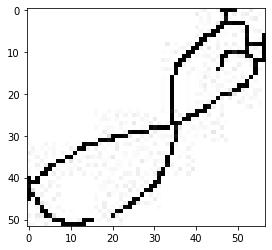

In [384]:
# main문
#np.set_printoptions(threshold=sys.maxsize)
img = Image.open("dataset_thinning/test18.jpg")
width, height = img.size
imshow(np.asarray(img))
print(width, height)

img_Copy = np.array(img)
img_Copy = np.array(img)< 125

padding=20

test = np.zeros((width+padding,height+padding))
print(test.shape)
for j in range(height):
    for i in range(width):
        if img_Copy[j][i][0] == 1:
            test[i+10][j+10]=1
        


In [391]:
def neighbours(x,y,image):
    "해당하는 점에 대하여 주변 픽셀 8개를 지정해줌"
    img = image
    x_1, y_1, x1, y1 = x-1, y-1, x+1, y+1
    return [ img[x_1][y], img[x_1][y1], img[x][y1], img[x1][y1],     # P2,P3,P4,P5
                img[x1][y], img[x1][y_1], img[x][y_1], img[x_1][y_1] ]    # P6,P7,P8,P9


def transitions(neighbours):
    "주변 픽셀을 9시방향부터 시작하여 시계방향으로 돌렸을 때 두픽셀이 0->1로 되는 갯수"
    n = neighbours +neighbours[0:1]      # P2, P3, ... , P8, P9, P2
    print(n)
    return sum( (n1, n2) == (0, 1) for n1, n2 in zip(n, n[1:]) )  # (P2,P3), (P3,P4), ... , (P8,P9), (P9,P2)

def distance(store1, store2):
    return math.sqrt((store1[0] - store2[0]) ** 2 + (store1[1] - store2[1]) ** 2)

Temp=[]
def getXY1(x,y,image):
    img=image
    x_1, y_1, x1, y1 = x-1, y-1, x+1, y+1
    if len(Temp)<15:
        if img[x_1][y]==1 and not (x_1,y) in Temp:
            Temp.append((x_1,y))
            getXY1(x_1,y,img)
        elif img[x_1][y1]==1 and not (x_1,y1) in Temp:
            Temp.append((x_1,y1))
            getXY1(x_1,y1,img)
        elif img[x][y1]==1 and not (x,y1) in Temp:
            Temp.append((x,y1))
            getXY1(x,y1,img)
        elif img[x1][y1]==1 and not (x1,y1) in Temp:
            Temp.append((x1,y1))
            getXY1(x1,y1,img)
        elif img[x1][y]==1 and not (x1,y) in Temp:
            Temp.append((x1,y))
            getXY1(x1,y,img)
        elif img[x1][y_1]==1 and not (x1,y_1) in Temp:
            Temp.append((x1,y_1))
            getXY1(x1,y_1,img)
        elif img[x][y_1]==1 and not (x,y_1) in Temp:
            Temp.append((x,y_1))
            getXY1(x,y_1,img)
        elif img[x_1][y_1]==1 and not (x_1,y_1) in Temp:
            Temp.append((x_1,y_1))
            getXY1(x_1,y_1,img)
         

    
         
def breaking(x,y,image):
    
    
    img =image
    
    getXY1(x,y,img)
    print("템프",Temp)

    if len(Temp)==15:
        xy0=Temp[0]
        xy1=Temp[7]
        xy2=Temp[14] 
        
        x1=xy0[0]-xy1[0]
        x2=xy2[0]-xy1[0]
        y1=xy0[1]-xy1[1]
        y2=xy2[1]-xy1[1]
        
        o1 = math.atan2(y1*y2-x1*y2, x1*x2+y1*y2)
        
        angle= abs(math.degrees(o1))
        
        if angle>30 and angle<130:
            print("검사",xy0,xy1,xy2,angle)
            return xy1
    
    return 0
    
def featuring(image):
    "끝점 분기점 꺽인점 찾기"
    Image_Thinned = image.copy()  # 이미지를 복사하여 넣음

        
    rows, columns = Image_Thinned.shape               # x for rows, y for columns

    # Step 끝점
    tail=[]
    bifur = []
    breakpoint = [] 
    for x in range(10, rows - 10):                     # No. of  rows
        for y in range(10, columns - 10):            # No. of columns
            del Temp[:]
            print("현재위치",x,y)
            #print(x,y)
            P2,P3,P4,P5,P6,P7,P8,P9 = n = neighbours(x, y, Image_Thinned)
            
           
            # Step 끝점
            if (Image_Thinned[x][y] == 1 and transitions(n) == 1):         
                tail.append((x,y))

            # Step 분기점
            elif (Image_Thinned[x][y] == 1 and sum(n) >= 3 and transitions(n) >= 3):         
                bifur.append((x,y))
            elif (Image_Thinned[x][y] == 1 and sum(n) == 2 and transitions(n)==2 ):
            # Step 꺽이는점
                breaktest=breaking(x,y,Image_Thinned)
                if breaktest!=0:
                    breakpoint.append(breaktest)



    for x, y in tail: 
        Image_Thinned[x][y] = 2            
    for x, y in bifur: 
        Image_Thinned[x][y] = 3
    for x, y in breakpoint: 
        Image_Thinned[x][y] = 4     


            
    return Image_Thinned



def find_nearest_neighbors(p,points, k=3):
    
    distances=[]
    
    for item in points:
        length=distance(p,item)
        if length<10:
            distances.append((length,item[0],item[1]))
    ind = sorted(distances)
    
    return ind[1:k]

In [392]:

get_img=featuring(test)  #tail,bifur,breakpoint


현재위치 10 10
현재위치 10 11
현재위치 10 12
현재위치 10 13
현재위치 10 14
현재위치 10 15
현재위치 10 16
현재위치 10 17
현재위치 10 18
현재위치 10 19
현재위치 10 20
현재위치 10 21
현재위치 10 22
현재위치 10 23
현재위치 10 24
현재위치 10 25
현재위치 10 26
현재위치 10 27
현재위치 10 28
현재위치 10 29
현재위치 10 30
현재위치 10 31
현재위치 10 32
현재위치 10 33
현재위치 10 34
현재위치 10 35
현재위치 10 36
현재위치 10 37
현재위치 10 38
현재위치 10 39
현재위치 10 40
현재위치 10 41
현재위치 10 42
현재위치 10 43
현재위치 10 44
현재위치 10 45
현재위치 10 46
현재위치 10 47
현재위치 10 48
현재위치 10 49
현재위치 10 50
[0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]
현재위치 10 51
[0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0]
현재위치 10 52
[0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0]
현재위치 10 53
[0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
현재위치 10 54
[0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0]
현재위치 10 55
[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0]
현재위치 10 56
현재위치 10 57
현재위치 10 58
현

현재위치 22 11
현재위치 22 12
현재위치 22 13
현재위치 22 14
현재위치 22 15
현재위치 22 16
현재위치 22 17
현재위치 22 18
현재위치 22 19
현재위치 22 20
현재위치 22 21
현재위치 22 22
현재위치 22 23
현재위치 22 24
현재위치 22 25
현재위치 22 26
현재위치 22 27
현재위치 22 28
현재위치 22 29
현재위치 22 30
현재위치 22 31
현재위치 22 32
현재위치 22 33
현재위치 22 34
현재위치 22 35
현재위치 22 36
현재위치 22 37
현재위치 22 38
현재위치 22 39
현재위치 22 40
현재위치 22 41
현재위치 22 42
현재위치 22 43
[0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0]
현재위치 22 44
현재위치 22 45
현재위치 22 46
현재위치 22 47
현재위치 22 48
현재위치 22 49
현재위치 22 50
현재위치 22 51
현재위치 22 52
현재위치 22 53
현재위치 22 54
현재위치 22 55
현재위치 22 56
현재위치 22 57
현재위치 22 58
현재위치 22 59
현재위치 22 60
현재위치 22 61
[1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0]
[1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0]
현재위치 23 10
현재위치 23 11
현재위치 23 12
현재위치 23 13
현재위치 23 14
현재위치 23 15
현재위치 23 16
현재위치 23 17
현재위치 23 18
현재위치 23 19
현재위치 23 20
현재위치 23 21
현재위치 23 22
현재위치 23 23
현재위치 23 24
현재위치 23 25
현재위치 23 26
현재위치 23 27
현재위치 23 28
현재위치 23 29
현재위치 23 30
현재위치 23 31
현재위치 23 32
현재

현재위치 32 34
현재위치 32 35
현재위치 32 36
현재위치 32 37
현재위치 32 38
현재위치 32 39
현재위치 32 40
[1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0]
[1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0]
템프 [(31, 40), (30, 40), (29, 41), (28, 41), (27, 41), (26, 42), (25, 42), (24, 42), (23, 42), (22, 43), (21, 44), (20, 45), (19, 45), (18, 46), (17, 46)]
현재위치 32 41
현재위치 32 42
현재위치 32 43
현재위치 32 44
현재위치 32 45
현재위치 32 46
현재위치 32 47
현재위치 32 48
현재위치 32 49
현재위치 32 50
현재위치 32 51
현재위치 32 52
현재위치 32 53
현재위치 32 54
현재위치 32 55
현재위치 32 56
현재위치 32 57
현재위치 32 58
[1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0]
[1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0]
템프 [(31, 58), (30, 59)]
현재위치 32 59
현재위치 32 60
현재위치 32 61
현재위치 33 10
현재위치 33 11
현재위치 33 12
현재위치 33 13
현재위치 33 14
현재위치 33 15
현재위치 33 16
현재위치 33 17
현재위치 33 18
현재위치 33 19
현재위치 33 20
현재위치 33 21
현재위치 33 22
현재위치 33 23
현재위치 33 24
현재위치 33 25
현재위치 33 26
현재위치 33 27
현재위치 33 28
현재위치 33 29
현재위치 33 30
현재위치 33 31
현재위치 33 32
현재위치 33 33
현재위치 33 34
현재위치 33 35
현재위치 33 36
현재위치 33 37
현재위치 33 38
현재위치 33 39


현재위치 43 40
현재위치 43 41
현재위치 43 42
현재위치 43 43
현재위치 43 44
현재위치 43 45
[0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]
템프 [(43, 46), (43, 47), (42, 48), (41, 49), (41, 50), (40, 51), (39, 52), (38, 53), (37, 54), (36, 55), (35, 55), (34, 56), (33, 57), (32, 58), (31, 58)]
현재위치 43 46
[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]
템프 [(43, 47), (42, 48), (41, 49), (41, 50), (40, 51), (39, 52), (38, 53), (37, 54), (36, 55), (35, 55), (34, 56), (33, 57), (32, 58), (31, 58), (30, 59)]
현재위치 43 47
[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]
템프 [(42, 48), (41, 49), (41, 50), (40, 51), (39, 52), (38, 53), (37, 54), (36, 55), (35, 55), (34, 56), (33, 57), (32, 58), (31, 58), (30, 59)]
현재위치 43 48
현재위치 43 49
현재위치 43 50
현재위치 43 51
현재위치 43 52
현재위치 43 53
현재위치 43 54
현재위치 43 55
현재위치 43 56
현재위치 43 57
현재위치 43 58
현재위치 43 59
현재위치 43 60
현재위치 43 61
현재위치 44 10
현재위치 44 11
현재위치 44 

현재위치 52 40
현재위치 52 41
현재위치 52 42
현재위치 52 43
현재위치 52 44
현재위치 52 45
현재위치 52 46
현재위치 52 47
현재위치 52 48
현재위치 52 49
현재위치 52 50
현재위치 52 51
현재위치 52 52
현재위치 52 53
현재위치 52 54
현재위치 52 55
현재위치 52 56
현재위치 52 57
현재위치 52 58
현재위치 52 59
현재위치 52 60
현재위치 52 61
현재위치 53 10
현재위치 53 11
현재위치 53 12
현재위치 53 13
현재위치 53 14
현재위치 53 15
현재위치 53 16
[1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0]
[1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0]
현재위치 53 17
현재위치 53 18
현재위치 53 19
현재위치 53 20
현재위치 53 21
현재위치 53 22
현재위치 53 23
현재위치 53 24
현재위치 53 25
현재위치 53 26
현재위치 53 27
현재위치 53 28
현재위치 53 29
현재위치 53 30
현재위치 53 31
현재위치 53 32
현재위치 53 33
[1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0]
[1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0]
현재위치 53 34
현재위치 53 35
현재위치 53 36
현재위치 53 37
현재위치 53 38
현재위치 53 39
현재위치 53 40
현재위치 53 41
현재위치 53 42
현재위치 53 43
현재위치 53 44
현재위치 53 45
현재위치 53 46
현재위치 53 47
현재위치 53 48
현재위치 53 49
현재위치 53 50
현재위치 53 51
현재위치 53 52
현재위치 53 53
현재위치 53 54
현재위치 53 55
현재위치 53 56
현재위치 53 57
현재위치 53 58
현재위치 53 59
현재위치 53 60
현재위치 53 61
현재

현재위치 65 22
[1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0]
[1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0]
현재위치 65 23
현재위치 65 24
현재위치 65 25
현재위치 65 26
현재위치 65 27
현재위치 65 28
현재위치 65 29
현재위치 65 30
현재위치 65 31
현재위치 65 32
현재위치 65 33
현재위치 65 34
현재위치 65 35
현재위치 65 36
현재위치 65 37
현재위치 65 38
현재위치 65 39
현재위치 65 40
현재위치 65 41
현재위치 65 42
현재위치 65 43
현재위치 65 44
현재위치 65 45
현재위치 65 46
현재위치 65 47
현재위치 65 48
현재위치 65 49
현재위치 65 50
현재위치 65 51
현재위치 65 52
현재위치 65 53
현재위치 65 54
현재위치 65 55
현재위치 65 56
현재위치 65 57
현재위치 65 58
현재위치 65 59
현재위치 65 60
현재위치 65 61
현재위치 66 10
현재위치 66 11
현재위치 66 12
현재위치 66 13
현재위치 66 14
현재위치 66 15
현재위치 66 16
[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
현재위치 66 17
[0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]
[0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]
현재위치 66 18
[1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0]
[1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0]
현재위치 66 19
[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0]
현재위치 66 20
[0.0, 0.0, 1.0, 0.0, 0.0,

In [393]:
print(Temp)


[]


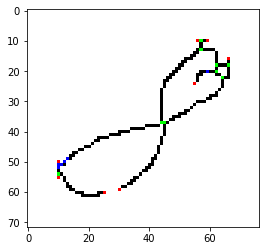

In [394]:
image = Image.new("RGB",(width+20,height+20),(255,255,255))
im = image.load()



for j in range(height+20):
    for i in range(width+20):

        if(get_img[i][j]==1):
            R = 0
            G = 0
            B = 0
            im[i,j] = (R,G,B)
            #print(i,j)
        elif(get_img[i][j]==2): #끝점
            R = 255
            G = 0
            B = 0
            im[i,j] = (R,G,B)
        elif(get_img[i][j]==3): #초록 분기점
            R = 0 
            G = 255
            B = 0
            im[i,j] = (R,G,B)
        elif(get_img[i][j]==4):#파랑 꺾인곳
            R = 0
            G = 0
            B = 255
            im[i,j] = (R,G,B)

imshow(np.asarray(image))
image.save("testss.bmp")
image.close()

In [395]:
for j in range(height+20):
    print()
    for i in range(width+20):
        print(get_img[i][j],end='')


0.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.0
0.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.0
0.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.0
0.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.0
0.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.

0.00.00.00.00.00.00.00.00.00.00.00.00.04.01.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.01.01.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.0
0.00.00.00.00.00.00.00.00.00.02.00.04.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.01.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.0
0.00.00.00.00.00.00.00.00.00.04.04.01.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.01.01.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.0
0.00.00.00.00.00.00.00.00.00.04.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.01.01.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.0
0.00.00.00.00.00.00.00.00.00.01.00.00.00.00.00.00.00.00.00.00.00.00.00.0

In [396]:
print(breakpoint)

<built-in function breakpoint>
